In [1]:
import os
import tensorflow as tf

# IMPORTANT: Set this BEFORE importing TensorFlow for the main experiment.
# This tells TensorFlow to only see and use GPU with index '3'.
# For your DGX assignment (dleg28-dleg36, cuda:3), this is the correct value.
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

print("--- GPU Verification ---")
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Restrict TensorFlow to only use the first visible GPU (which is now cuda:3)
        tf.config.set_visible_devices(gpus[0], 'GPU')
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(f"✅ Success! TensorFlow is using the assigned GPU.")
        print(f"   Physical GPUs found: {len(gpus)}")
        print(f"   Logical GPU being used: {len(logical_gpus)}")
        print(f"   Details: {gpus[0].name}")
    except RuntimeError as e:
        # Visible devices must be set before GPUs have been initialized
        print(f"❌ Error setting up GPU: {e}")
else:
    print("❌ Critical Warning: No GPU found. TensorFlow will use the CPU.")
    print("   Please check your Jupyter kernel and node allocation.")

print("----------------------")

2025-09-18 09:13:19.157629: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-18 09:13:19.189883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758166999.214267  854162 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758166999.221437  854162 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1758166999.241649  854162 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

--- GPU Verification ---
✅ Success! TensorFlow is using the assigned GPU.
   Physical GPUs found: 1
   Logical GPU being used: 1
   Details: /physical_device:GPU:0
----------------------


I0000 00:00:1758167021.841192  854162 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 139784 MB memory:  -> device: 0, name: NVIDIA H200, pci bus id: 0000:61:00.0, compute capability: 9.0


In [2]:
!pip install tensorflow matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


Loading and preparing MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Data shapes ready: x_train=(60000, 28, 28, 1), x_test=(10000, 28, 28, 1)

--- Model Summary ---


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

---------------------

--- Starting Model Training ---
Epoch 1/30


I0000 00:00:1758167120.212902  866421 service.cc:152] XLA service 0x7f29f800af00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758167120.212975  866421 service.cc:160]   StreamExecutor device (0): NVIDIA H200, Compute Capability 9.0
2025-09-18 09:15:20.341431: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1758167120.687275  866421 cuda_dnn.cc:529] Loaded cuDNN version 90300


 24/235 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.5481

I0000 00:00:1758167123.858146  866421 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.2248 - val_loss: 0.0778
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0771 - val_loss: 0.0727
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0727 - val_loss: 0.0716
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0710 - val_loss: 0.0692
Epoch 5/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0697 - val_loss: 0.0683
Epoch 6/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0689 - val_loss: 0.0677
Epoch 7/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0683 - val_loss: 0.0673
Epoch 8/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0678 - val_loss: 0.0668
Epoch 9/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0673 - val_loss: 0.0665
Epoch 10/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0670 - val_loss: 0.0661
Epoch 11/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0666 - val_loss: 0.0660
Epoch 12/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - lo

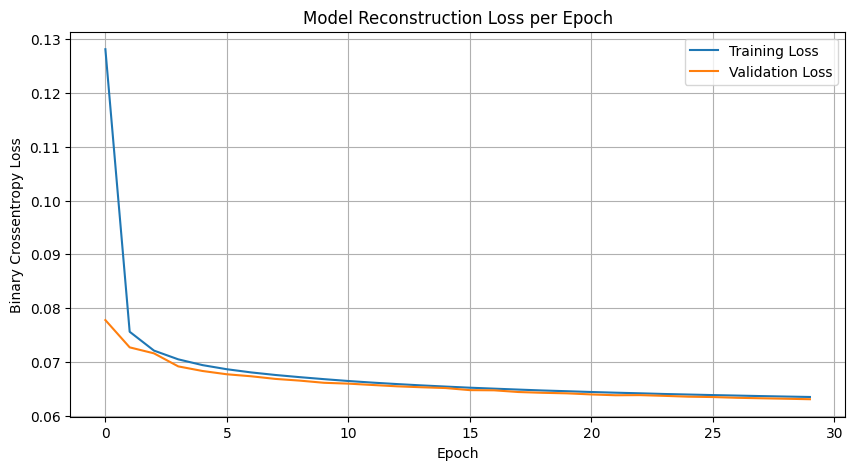

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


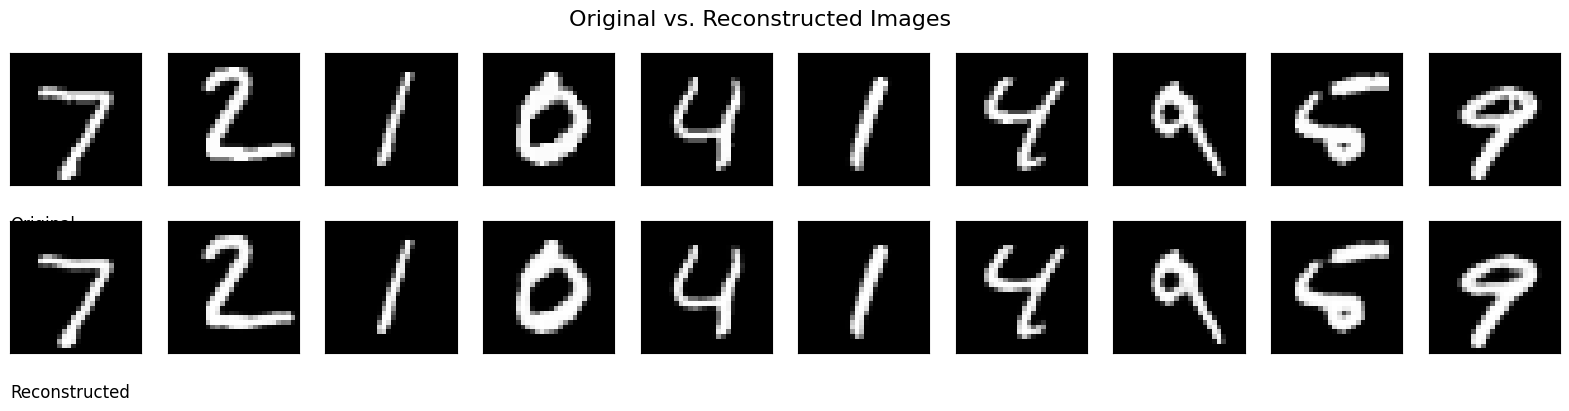


--- Experiment Finished Successfully! ---


In [3]:
# Full Convolutional Autoencoder Experiment for Jupyter Notebook

# Make sure the os.environ setting from Step 1 has been run in a previous cell!
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# =========================
# 1. Reproducibility
# Ensures that if you run the code again, you get the exact same results.
# =========================
SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# =========================
# 2. Configuration
# =========================
EPOCHS = 30
BATCH_SIZE = 256 # A larger batch size is good for powerful GPUs.

# =========================
# 3. Data Loading & Preparation
# TensorFlow will handle downloading and caching this dataset for you.
# =========================
print("Loading and preparing MNIST dataset...")
# We only need the images (x), not the labels (y), so we use '_' for the labels.
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

# Preprocessing:
# a) Normalize pixel values from the [0, 255] range to the [0, 1] range.
#    This is standard practice and helps the model train more effectively.
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# b) Add a "channel" dimension. CNNs expect input of shape (N, H, W, C).
#    Since MNIST is grayscale, the number of channels (C) is 1.
x_train = np.expand_dims(x_train, -1) # Shape becomes (60000, 28, 28, 1)
x_test  = np.expand_dims(x_test, -1)  # Shape becomes (10000, 28, 28, 1)
print(f"Data shapes ready: x_train={x_train.shape}, x_test={x_test.shape}")


# =========================
# 4. Model Definition
# Here we define the two parts of the autoencoder: Encoder and Decoder.
# =========================
def create_autoencoder():
    """
    Defines the Convolutional Autoencoder architecture.
    - Encoder: Compresses the image into a small "latent" representation.
    - Decoder: Reconstructs the image from the latent representation.
    """
    # Input layer: specifies the shape of one image.
    input_img = layers.Input(shape=(28, 28, 1))

    # --- Encoder ---
    # (28, 28, 1) -> Conv -> (28, 28, 32) -> Pool -> (14, 14, 32)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    # (14, 14, 32) -> Conv -> (14, 14, 64) -> Pool -> (7, 7, 64)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x) # This is the compressed "bottleneck"

    # --- Decoder ---
    # (7, 7, 64) -> Conv -> (7, 7, 64) -> UpSample -> (14, 14, 64)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    # (14, 14, 64) -> Conv -> (14, 14, 32) -> UpSample -> (28, 28, 32)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    # (28, 28, 32) -> Conv -> (28, 28, 1)
    # Sigmoid activation squashes the output values to be between 0 and 1, just like our input images.
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    # Create the final model that maps inputs to their decoded reconstruction.
    autoencoder = models.Model(input_img, decoded)
    return autoencoder

autoencoder = create_autoencoder()
print("\n--- Model Summary ---")
autoencoder.summary() # Prints a table summarizing the model's layers and parameters.
print("---------------------\n")

# =========================
# 5. Compile the Model
# Configures the model for training by specifying the optimizer and loss function.
# =========================
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# =========================
# 6. Train the Model
# This is where the learning happens. The model learns to reconstruct the input images.
# =========================
print("--- Starting Model Training ---")
# We use x_train as both the input and the target, as the goal is reconstruction.
history = autoencoder.fit(x_train, x_train,
                          epochs=EPOCHS,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1) # verbose=1 shows the progress bar
print("--- Training Complete ---\n")

# =========================
# 7. Plot Training & Validation Loss
# Visualizes how the model's error decreased over time.
# Good models have training and validation loss curves that are close together.
# =========================
print("--- Plotting Results ---")
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Reconstruction Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Binary Crossentropy Loss')
plt.legend()
plt.grid(True)
plt.show()

# =========================
# 8. Visualize Reconstructions
# We take a few images from the test set, have the model reconstruct them,
# and then plot the original next to the reconstruction to see how well it did.
# =========================
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
plt.suptitle("Original vs. Reconstructed Images", fontsize=16)
for i in range(n):
    # Display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Original", loc='left', y=-0.4)

    # Display reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Reconstructed", loc='left', y=-0.4)
plt.show()

print("\n--- Experiment Finished Successfully! ---")


--- Analyzing Original Image ---
Original Dimensions: 1490px x 1480px
Original File Size: 34.15 KB

--- Pre-processing Image for Autoencoder ---
Processed Dimensions for Model: (1, 28, 28, 1)

--- Reconstructing Image ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
--- Displaying Results ---


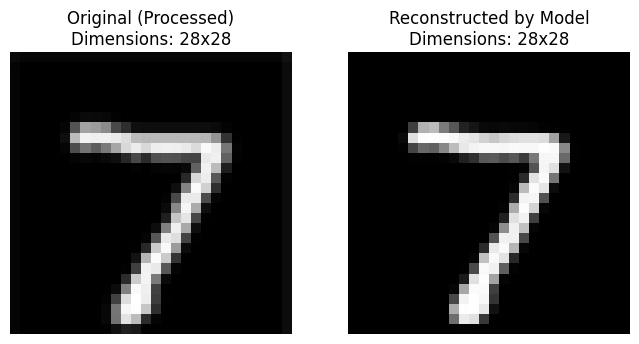


The reconstructed image is a NumPy array in memory.
Memory size of this array: 3.06 KB
This is NOT a compressed file size. It's just the memory taken by the final pixel data.


In [9]:
# Full Experiment: Applying the Digit Autoencoder to a Real Image

import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Make sure your 'autoencoder' model from the previous cell is still in memory!

# =========================
# 1. Download and Analyze the Original Image
# =========================
print("--- Analyzing Original Image ---")
# We'll use a URL of a simple image of a strawberry.
image_url = 'https://machinelearningmastery.com/wp-content/uploads/2019/02/sample_image.png' # A simple strawberry image

try:
    # Download the image data
    response = requests.get(image_url)
    response.raise_for_status()  # Raise an exception if the download fails
    
    # Get file size from the downloaded content
    original_size_kb = len(response.content) / 1024
    
    # Open the image using the Pillow library
    original_image = Image.open(io.BytesIO(response.content))
    
    # Get original dimensions
    original_width, original_height = original_image.size
    
    print(f"Original Dimensions: {original_width}px x {original_height}px")
    print(f"Original File Size: {original_size_kb:.2f} KB")
    
except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")
    # If download fails, we can't proceed.
    # You might need to check the DGX system's internet connection or firewall.

# =========================
# 2. Pre-process the Image for Our Model
# The autoencoder only accepts 28x28 grayscale images.
# =========================
print("\n--- Pre-processing Image for Autoencoder ---")

# a) Convert to grayscale ('L' mode in Pillow)
# b) Resize to 28x28 pixels
processed_image = original_image.convert('L').resize((28, 28))

# Convert the Pillow image to a NumPy array for TensorFlow
# The values will be in the range [0, 255]
image_array = np.array(processed_image)

# Normalize the pixel values to the [0, 1] range and add batch/channel dimensions
# Final shape needs to be (1, 28, 28, 1) to represent one single-channel image.
model_input = (image_array.astype('float32') / 255.0).reshape(1, 28, 28, 1)

print(f"Processed Dimensions for Model: {model_input.shape}")


# =========================
# 3. Get the Reconstruction from the Autoencoder
# =========================
print("\n--- Reconstructing Image ---")
# Use the trained autoencoder to predict (reconstruct) the image
reconstructed_array = autoencoder.predict(model_input)


# =========================
# 4. Visualize the Results and Analyze the Output
# =========================
print("--- Displaying Results ---")

# Reshape the arrays to 2D for plotting
original_for_plot = model_input.reshape(28, 28)
reconstructed_for_plot = reconstructed_array.reshape(28, 28)

# Create a side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.imshow(original_for_plot, cmap='gray')
ax1.set_title(f"Original (Processed)\nDimensions: 28x28")
ax1.axis('off')

ax2.imshow(reconstructed_for_plot, cmap='gray')
ax2.set_title(f"Reconstructed by Model\nDimensions: 28x28")
ax2.axis('off')

plt.show()

# --- Analysis of the "Reconstructed" Image ---
# The reconstructed image is an in-memory array of numbers (32-bit floats).
# Its "size" is not a compressed file size like a JPG.
# The actual compression happened in the model's bottleneck layer.
reconstructed_size_bytes = reconstructed_array.nbytes
print(f"\nThe reconstructed image is a NumPy array in memory.")
print(f"Memory size of this array: {reconstructed_size_bytes / 1024:.2f} KB")
print("This is NOT a compressed file size. It's just the memory taken by the final pixel data.")

### For Color Images CIFAR

--- Loading CIFAR-10 Dataset ---
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 72s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape:     (10000, 32, 32, 3)

--- Color Autoencoder Summary ---


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 8, 8, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 333,955 (1.27 MB)

 Trainable params: 333,955 (1.27 MB)

 Non-trainable params: 0 (0.00 B)


--- Training Color Autoencoder ---
Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 41ms/step - loss: 0.0345 - val_loss: 0.0123
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0121 - val_loss: 0.0106
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0092 - val_loss: 0.0090
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0084 - val_loss: 0.0077
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0079 - val_loss: 0.0083
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0073 - val_loss: 0.0068
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 9/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0065 - val_loss: 0.0061
Epoch 10/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0063 - val_loss: 0.0059
Epoch 11/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0061 - val_loss: 0.0058
Epoc

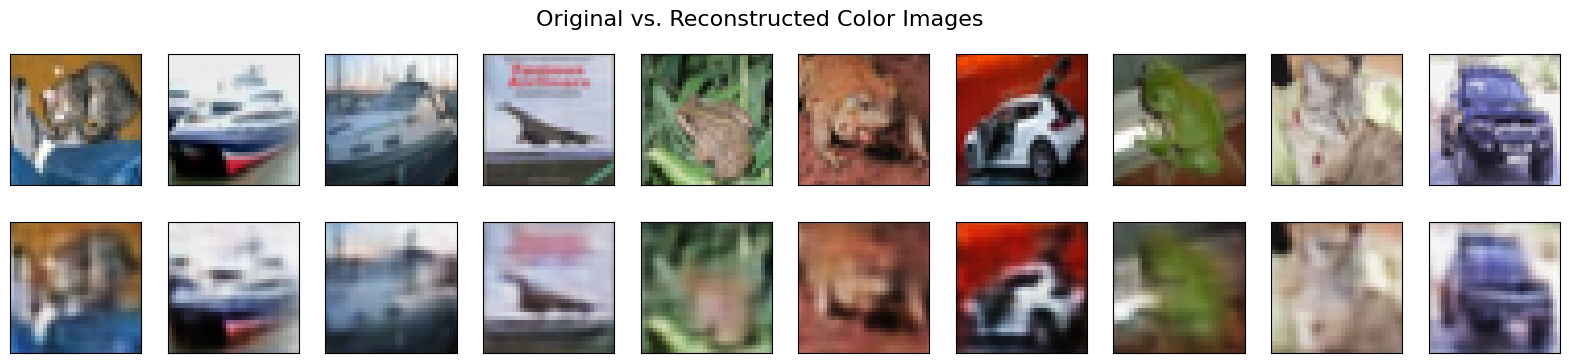

In [10]:
# Convolutional Autoencoder for Color Images (CIFAR-10)

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# =========================
# 1. Load the CIFAR-10 Color Image Dataset
# We only need the images, so we'll ignore the labels (y_train, y_test)
# =========================
print("--- Loading CIFAR-10 Dataset ---")
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()

# =========================
# 2. Pre-process the Data
# =========================
# Normalize pixel values from [0, 255] to the [0, 1] range.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Training data shape: {x_train.shape}") # -> (50000, 32, 32, 3)
print(f"Test data shape:     {x_test.shape}") # -> (10000, 32, 32, 3)


# =========================
# 3. Define the Color Autoencoder Model
# The architecture is similar, but updated for 3-channel images.
# =========================
def create_color_autoencoder():
    # The input shape is now (32, 32, 3) for color images
    input_img = layers.Input(shape=(32, 32, 3))

    # --- Encoder ---
    # 32x32x3 -> 16x16x32
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    # 16x16x32 -> 8x8x64
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    # 8x8x64 -> 4x4x128 (This is our compressed bottleneck)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    # --- Decoder ---
    # 4x4x128 -> 8x8x128
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    # 8x8x128 -> 16x16x64
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    # 16x16x64 -> 32x32x32
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    
    # --- CRITICAL CHANGE ---
    # The final layer must output 3 channels to reconstruct the RGB image.
    # Sigmoid activation ensures the output values are between 0 and 1.
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    model = models.Model(input_img, decoded)
    return model

# Create and compile the model
color_autoencoder = create_color_autoencoder()
# We can use 'mse' (mean squared error) which often works well for natural images,
# or stick with 'binary_crossentropy'. Let's try mse.
color_autoencoder.compile(optimizer='adam', loss='mse')

print("\n--- Color Autoencoder Summary ---")
color_autoencoder.summary()


# =========================
# 4. Train the Model
# This will take longer than MNIST because the images and model are more complex.
# On your DGX, it should still be quite fast.
# =========================
print("\n--- Training Color Autoencoder ---")
history = color_autoencoder.fit(x_train, x_train,
                                epochs=50, # Color images need more training
                                batch_size=256,
                                shuffle=True,
                                validation_data=(x_test, x_test))

# =========================
# 5. Visualize the Results
# =========================
print("\n--- Reconstructing and Plotting Results ---")
# Get the reconstructed images from the test set
reconstructed_imgs = color_autoencoder.predict(x_test)

# --- Plot original vs. reconstructed images ---
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
plt.suptitle("Original vs. Reconstructed Color Images", fontsize=16)
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

--- Analyzing Original Color Image ---
Original Dimensions: 1029px x 686px
Original File Size: 75.44 KB

--- Pre-processing Image for COLOR Autoencoder ---
Processed Dimensions for Model: (1, 32, 32, 3)

--- Reconstructing Image ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
--- Displaying Results ---


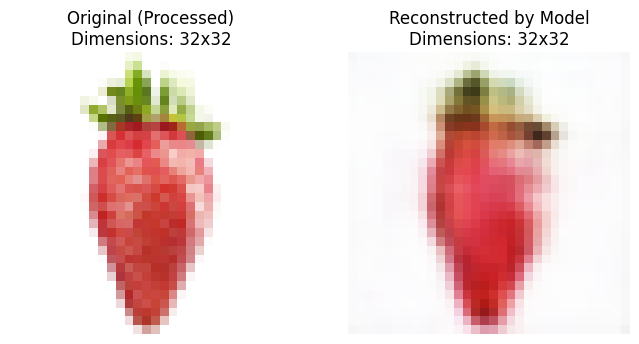


The reconstructed image is a NumPy array in memory.
Memory size of this array: 12.00 KB
This demonstrates the model's ability to reconstruct an image from its compressed state.


In [13]:
# Full Experiment: Applying the COLOR Autoencoder to a Real Color Image

import requests
from PIL import Image
import io
import numpy as np
import matplotlib.pyplot as plt

# Make sure your 'color_autoencoder' model is still in memory!

# =========================
# 1. Download and Analyze the Original Image
# =========================
print("--- Analyzing Original Color Image ---")
# This is a picture of a bird, which is one of the classes in CIFAR-10.
image_url = 'https://c02.purpledshub.com/uploads/sites/41/2023/09/GettyImages_154514873.jpg?w=1029&webp=1'

try:
    # Download the image data
    response = requests.get(image_url)
    response.raise_for_status()
    
    # Get file size
    original_size_kb = len(response.content) / 1024
    
    # Open the image using Pillow
    original_image = Image.open(io.BytesIO(response.content))
    
    # Get original dimensions
    original_width, original_height = original_image.size
    
    print(f"Original Dimensions: {original_width}px x {original_height}px")
    print(f"Original File Size: {original_size_kb:.2f} KB")
    
except requests.exceptions.RequestException as e:
    print(f"Error downloading image: {e}")

# =========================
# 2. Pre-process the Image for our COLOR Model
# The color autoencoder expects 32x32 color images.
# =========================
print("\n--- Pre-processing Image for COLOR Autoencoder ---")

# a) Ensure image is in RGB format (it should be, but this is good practice)
# b) Resize to 32x32 pixels
processed_image = original_image.convert('RGB').resize((32, 32))

# Convert the Pillow image to a NumPy array
image_array = np.array(processed_image)

# Normalize and reshape for the model.
# The final shape must be (1, 32, 32, 3)
model_input = (image_array.astype('float32') / 255.0).reshape(1, 32, 32, 3)

print(f"Processed Dimensions for Model: {model_input.shape}")


# =========================
# 3. Get the Reconstruction from the COLOR Autoencoder
# =========================
print("\n--- Reconstructing Image ---")
# Use the trained color_autoencoder to predict the image
reconstructed_array = color_autoencoder.predict(model_input)


# =========================
# 4. Visualize the Results and Analyze the Output
# =========================
print("--- Displaying Results ---")

# Reshape the arrays for plotting
original_for_plot = model_input.reshape(32, 32, 3)
reconstructed_for_plot = reconstructed_array.reshape(32, 32, 3)

# Clip values to be in the valid [0, 1] range for displaying images
reconstructed_for_plot = np.clip(reconstructed_for_plot, 0, 1)

# Create a side-by-side plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))

ax1.imshow(original_for_plot)
ax1.set_title(f"Original (Processed)\nDimensions: 32x32")
ax1.axis('off')

ax2.imshow(reconstructed_for_plot)
ax2.set_title(f"Reconstructed by Model\nDimensions: 32x32")
ax2.axis('off')

plt.show()

# --- Analysis ---
reconstructed_size_bytes = reconstructed_array.nbytes
print(f"\nThe reconstructed image is a NumPy array in memory.")
print(f"Memory size of this array: {reconstructed_size_bytes / 1024:.2f} KB")
print("This demonstrates the model's ability to reconstruct an image from its compressed state.")
